In [1]:
#import necessary packages and libraries 

import pandas as pd
import numpy as np
import sklearn 

import matplotlib.pyplot as plt
import scipy 
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from scipy import stats 

C:\Users\foogu\AppData\Local\Temp\ipykernel_4740\1250496545.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_data = pd.read_csv(r"C:\Users\foogu\OneDrive\Documents\Titanic\train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv(r"C:\Users\foogu\OneDrive\Documents\Titanic\test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Instantiate a dataset columns variable to facilitate easier retrieval
columns = train_data.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)

C:\Users\foogu\AppData\Local\Temp\ipykernel_4740\4258443000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)


In [8]:
one_hot_encoded_data = pd.get_dummies(train_data, columns = ['Embarked', 'Sex'], dtype=int)
print (type(one_hot_encoded_data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
one_hot_encoded_test = pd.get_dummies(test_data, columns = ['Embarked', 'Sex'], dtype=int)
one_hot_encoded_test.head(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,0,0,1,0,1
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,0,1,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,0,0,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,1,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,0,0,1,0,1


In [10]:
one_hot_encoded_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [11]:
train_data = pd.concat([train_data, one_hot_encoded_data[['Embarked_C', 'Embarked_Q', 'Embarked_S','Sex_female','Sex_male']]], axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [12]:
test_data =pd.concat([test_data, one_hot_encoded_test[['Embarked_C', 'Embarked_Q', 'Embarked_S','Sex_female','Sex_male']]], axis=1)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,1,0,1


In [13]:
train_data.drop(columns=['Embarked', 'Name', 'Sex'], inplace=True)

In [14]:
test_data.drop(columns=['Embarked', 'Name', 'Sex'], inplace=True)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked_C   891 non-null    int32  
 10  Embarked_Q   891 non-null    int32  
 11  Embarked_S   891 non-null    int32  
 12  Sex_female   891 non-null    int32  
 13  Sex_male     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5), object(2)
memory usage: 80.2+ KB


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked_C   418 non-null    int32  
 9   Embarked_Q   418 non-null    int32  
 10  Embarked_S   418 non-null    int32  
 11  Sex_female   418 non-null    int32  
 12  Sex_male     418 non-null    int32  
dtypes: float64(2), int32(5), int64(4), object(2)
memory usage: 34.4+ KB


In [17]:
trained_data_updated = train_data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male']]

trained_data_updated.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.000000,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.000000,0,0,8.0500,0,0,1,0,1
5,6,0,3,29.699118,0,0,8.4583,0,1,0,0,1
6,7,0,1,54.000000,0,0,51.8625,0,0,1,0,1
7,8,0,3,2.000000,3,1,21.0750,0,0,1,0,1
8,9,1,3,27.000000,0,2,11.1333,0,0,1,1,0
9,10,1,2,14.000000,1,0,30.0708,1,0,0,1,0


<Axes: >

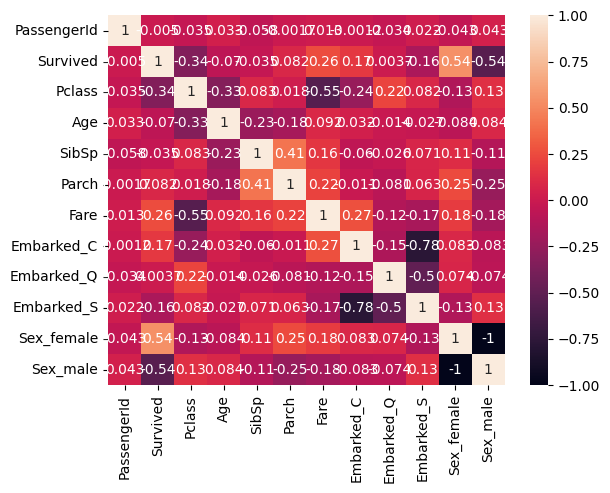

In [18]:
sns.heatmap(trained_data_updated.corr(), annot=True)

In [19]:
trained_data_updated.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.131900,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121,-0.084153,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.182333,-0.182333
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.082853,-0.082853
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.074115,-0.074115
Embarked_S,0.022148,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.125722,0.125722


In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [21]:
y = trained_data_updated['Survived']

features = ['Pclass', 'Embarked_C', 'Fare', 'Sex_female']

In [22]:
X = trained_data_updated[features]
# X, y = load_iris(return_X_y=True)
X.describe()

,Pclass,Embarked_C,Fare,Sex_female
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.188552,32.204208,0.352413
std,0.836071,0.391372,49.693429,0.477990
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,14.454200,0.000000
75%,3.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,512.329200,1.000000


In [23]:
# z_score_fare = np.abs(stats.zscore(X['Fare']))

# threshold = 3
# outliers = X[ (z_score_fare > threshold)]
# removal_indices = outliers.index

In [24]:
# scale = StandardScaler()
# scale.fit(X)

In [25]:
# X_scaled = scale.fit_transform(X.to_numpy())
# X_scaled = pd.DataFrame(X_scaled, columns = ['Pclass', 'Embarked_C', 'Fare', 'Sex_female'])
# X_scaled

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Embarked_C  891 non-null    int32  
 2   Fare        891 non-null    float64
 3   Sex_female  891 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 21.0 KB


In [27]:
# y.drop(index=removal_indices, inplace=True)

In [28]:
X_test = test_data[features]
X_test.describe()

,Pclass,Embarked_C,Fare,Sex_female
count,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.244019,35.627188,0.363636
std,0.841838,0.430019,55.907576,0.481622
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,14.454200,0.000000
75%,3.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,512.329200,1.000000


In [29]:
#define the cross-validation method to use
num_folds = 10
cv = KFold(n_splits=num_folds, random_state=42, shuffle=True)

In [30]:
# initializing all the base model objects with default parameters
model_1 = DecisionTreeClassifier(random_state = 42)
model_2 = RandomForestClassifier(random_state=42, bootstrap=True)
# model_3 = SVC(kernel='linear')(random_state=42)
# model_3 = GradientBoostingClassifier(random_state=42, n_estimators=50)
final_model = HistGradientBoostingClassifier(random_state=42, max_iter=100, learning_rate=0.5)


In [31]:
# training Decision Tree model
model_1.fit(X, y)
val_pred_1 = model_1.predict(X)
test_pred_1 = model_1.predict(X_test)

# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)

In [32]:
# training RandomForestClassifier model
model_2.fit(X, y)
val_pred_2 = model_2.predict(X)
test_pred_2 = model_2.predict(X_test)

# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

In [33]:
# training Logistic Regression model
# model_3.fit(X, y)
# val_pred_3 = model_3.predict(X)
# test_pred_3 = model_3.predict(X_test)

# # converting to dataframe
# val_pred_3 = pd.DataFrame(val_pred_3)
# test_pred_3 = pd.DataFrame(test_pred_3)

In [34]:
# concatenating validation dataset along with all the predicted validation data (meta features)
df_val = pd.concat([X, val_pred_1, val_pred_2], axis=1)
df_test = pd.concat([X_test, test_pred_1, test_pred_2], axis=1)

In [35]:
df_val.columns = df_val.columns.astype(str)

In [36]:
df_val.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Embarked_C  891 non-null    int32  
 2   Fare        891 non-null    float64
 3   Sex_female  891 non-null    int32  
 4   0           891 non-null    int64  
 5   0           891 non-null    int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 34.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [37]:
df_test.columns = df_test.columns.astype(str)

In [38]:
final_model.fit(df_val, y)
cross_val_results = cross_val_score(final_model, df_val, y, cv=cv)
cross_val_results

array([0.88888889, 0.88764045, 0.86516854, 0.87640449, 0.87640449,
       0.91011236, 0.84269663, 0.87640449, 0.87640449, 0.8988764 ])

In [39]:
round(cross_val_results.mean(),3)

0.88

In [40]:
predictions = final_model.predict(df_test)

In [41]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
